# Modelo SIRD de la pandemia COVID-19 en Colombia

Por:

Diego Andrés Alvarez Marín, Phd

Profesor Asociado de Ingeniería Civil

Facultad de Ingeniería y Arquitectura

Universidad Nacional de Colombia, Sede Manizales

daalvarez@unal.edu.co

El objetivo de este cuaderno es realizar una proyección del COVID19 en Colombia basado en el modelo epidemiológico **SIRD** (**S**=susceptibles, **I**=infectados, **R**=recuperados, **D**=deaths - muertes). Los datos empleados en la modelación corresponden a los que han sido públicamente difundidos por el [Instituto Nacional  de  Salud](https://www.ins.gov.co).

## El modelo SIRD
El modelo SIRD es uno de los modelos epidemiológicos más sencillos y populares, ya que este es capaz de capturar muchas de las características típicas de los brotes epidémicos. El modelo divide la población expuesta a la infección en cuatro grupos mutuamente excluyentes:

* Población susceptible ($S$): individuos sin inmunidad al agente infeccioso y que por tanto pueden ser infectados si son expuestos a este.

* Población infectada ($I$): individuos que están infectados en un momento dado y pueden transmitir la infección a personas de la población susceptibles con los que entran en contacto.

* Población recuperada ($R$), individuos que se curaron de la infección, que ahora son inmunes y que ya no la propagan.

* Defunciones/Fallecidos ($D$): individuos que murieron a causa del agente infeccioso.

La suma de estas cuatro variables es la constante $N = S+I+R+D$ y es igual a la población total, que en Colombia equivale a:

In [19]:
N = 50_372_424 # personas

El modelo SIRD relaciona los cambios en estas cuatro poblaciones a través tres parámetros:
* la tasa de infección o transmisión $\beta$ que representa el número promedio de individuos susceptibles que una infectado contagia por día. Esta variable depende del grado de distanciamiento social y de las prácticas higiénicas que adopte la población. Poco distanciamiento social y malas prácticas higiénicas se reflejan en un $\beta$ alto.
* la tasa de recuperación $\gamma$, la cual representa la tasa de personas infectadas que se recuperan y dejan de ser contagiosas.
* la tasa de mortalidad $\mu$, la cual representa la tasa de personas infectadas que mueren.

El modelo SIRD utiliza el sistema de ecuaciones diferenciales ordinarias no lineales:

$$
\begin{align}
& \frac{dS(t)}{dt} = - \frac{\beta I(t) S(t)}{N} \\
& \frac{dI(t)}{dt} = \frac{\beta I(t) S(t)}{N} - \gamma I(t) - \mu I(t) \\
& \frac{dR(t)}{dt} = \gamma I(t) \\
& \frac{dD(t)}{dt} = \mu I(t)
\end{align}
$$

donde la variable tiempo $t$ se modela en días. Dicho sistema de ecuaciones diferenciales se puede modelar en el lenguaje de programación Python así:

In [2]:
# S(t): número de personas susceptibles en el día t
# I(t): número de personas infectadas   en el día t
# R(t): número de personas recuperadas  en el día t
# D(t): número de personas fallecidas   en el día t
def dx_dt_SIRD(x, t, param):
    S, I, R, D = x
    beta, gamma, mu = param
    dS_dt = -beta*S*I/N
    dI_dt =  beta*S*I/N - gamma*I - mu*I
    dR_dt =  gamma*I
    dD_dt =  mu*I
    return [dS_dt, dI_dt, dR_dt, dD_dt]

## Limitaciones y suposiciones del modelo SIRD
El modelo SIRD hace las siguientes suposiciones:
* La interacción entre los individuos es aleatoria.
* Las personas recuperadas no se reinfectan.
* No se tiene en cuenta que la población $N$ es variable debido a fenómenos como nacimientos y muertes por otras causas y viajes al extranjero.
* La población es de tamaño fijo. El modelo no tiene en cuenta que después de infectada una persona existe un periodo en el cual el infectado no propaga la enfermedad. Para el COVID19 se dice que el periodo de propagación por parte de una persona infectada empieza aproximadamente 3 días antes de presentar síntomas visibles y se mantiene por 7 a 9 días después de este evento.
* Las políticas públicas que propenden por el control de la infección no cambian en el tiempo y están representadas en la muestra inicial con la que se ajusta el modelo.
* La naturaleza infecciosa del virus no cambia en el tiempo; en otras palabras, el modelo no tiene en cuenta que las enfermedades tienen periodos en las cuales son más contagiosas.
* El modelo no tiene en cuenta que la población está distribuída de forma heterogénea por el país.
* De acuerdo a las ecuaciones diferenciales el término $\frac{\beta I(t) S(t)}{N}$ refleja el hecho de que todos los infectados tienen igual capacidad de contagiar el virus y que todas las personas susceptibles tienen las mismas probabilidades de contagiarse, lo cual es poco ideal en un escenario real. Por lo tanto, el modelo asume que la población es homogénea.
* El modelo no tiene en cuenta que al saturarse el sistema de salud, la tasa de mortalidad $\mu$ tiende a crecer.

## Datos para el ajuste

Se utilizaron los datos que son publicados diariamente por el [Instituto Nacional  de  Salud](https://www.ins.gov.co/Noticias/paginas/coronavirus.aspx). En particular, se usó la base de datos tabulada por [ESRI Colombia](http://datosabiertos.esri.co/datasets). De dicha información se extraen los datos a partir de abril 10 de 2020, ya que en abril 5 y 6 hay una inconsistencia en los datos (no suman correctamente) y en abril 8 y 9 las fechas fueron presentadas con un formato diferente al resto, lo que podría corresponder a un error. De este modo, la base de datos útil se convierte en:

In [3]:
import pandas as pd
dfcompleto = pd.read_csv('Colombia_COVID19_Coronavirus_casos_diarios.csv', 
      skiprows=[i for i in range(1,36)],
      usecols=['FECHA_ACTUALIZACION','TOTAL_RECUPERADOS', 'TOTAL_MUERTES', 'TOTAL_CASOS'])

dfcompleto

,TOTAL_CASOS,TOTAL_MUERTES,TOTAL_RECUPERADOS,FECHA_ACTUALIZACION
0,2473,80,197,2020/04/10 05:00:00+00
1,2709,100,214,2020/04/11 05:00:00+00
2,2776,109,270,2020/04/12 05:00:00+00
3,2852,112,319,2020/04/13 05:00:00+00
4,2979,127,354,2020/04/14 05:00:00+00
...,...,...,...,...
112,295508,10105,154387,2020/07/31 05:00:00+00
113,306181,10330,160708,2020/08/01 05:00:00+00
114,317651,10650,167239,2020/08/02 05:00:00+00
115,327850,11017,173727,2020/08/03 05:00:00+00


Para hacer la regresión, se seleccionaron los últimos 21 días,

In [21]:
# La regresión se hará utilizando los últimos "Ndata" días de la base de datos
Ndata = 21 # días = 3 semanas

ya que la información más reciente representa las acciones gubernamentales en curso y la historia de contagios, recuperación y muerte en el país:

In [5]:
# Utilizar los datos de los últimos "Ndata" días para hacer el ajuste
df = dfcompleto.tail(Ndata) 
fecha_regresion = pd.to_datetime(df['FECHA_ACTUALIZACION'])
fecha_hoy = fecha_regresion.iloc[-1]
Rd = df['TOTAL_RECUPERADOS'].to_numpy() # número de recuperados
Dd = df['TOTAL_MUERTES'].to_numpy()     # número de fallecidos
Td = df['TOTAL_CASOS'].to_numpy()       # número de casos reportados
Id = Td - Dd - Rd                       # número de infectados
Sd = N - Td                             # número de personas susceptibles

de modo que la base de datos empleada para hacer la regresión se convierte en:

In [6]:
df

,TOTAL_CASOS,TOTAL_MUERTES,TOTAL_RECUPERADOS,FECHA_ACTUALIZACION
96,165169,5814,71738,2020/07/15 05:00:00+00
97,173206,6029,76164,2020/07/16 05:00:00+00
98,182140,6288,80637,2020/07/17 05:00:00+00
99,190700,6516,85836,2020/07/18 05:00:00+00
100,197278,6736,91793,2020/07/19 05:00:00+00
101,204005,6929,95804,2020/07/20 05:00:00+00
102,211038,7166,98840,2020/07/21 05:00:00+00
103,218428,7373,101613,2020/07/22 05:00:00+00
104,226373,7688,107951,2020/07/23 05:00:00+00
105,233541,7975,113864,2020/07/24 05:00:00+00


## Preparación del modelo
Para la solución del modelo matemático, requiere la especificación de unos valores tentativos de los parámetros y unas condiciones iniciales. 

### Parámetros iniciales
Para la especificación de los valores tentativos de los parámetros iniciales, se consultó en la [literatura](https://arxiv.org/pdf/2003.14288.pdf) los rangos de valores asociadas a las constantes $\beta$, $\gamma$ y $\mu$. De esta forma se especificaron:

In [7]:
beta0  = 0.044      # tasa de transmisión [1/día]
gamma0 = 0.015      # tasa de recuperación [1/día]
mu0    = 0.0045     # tasa de mortalidad [1/día]

### Condiciones iniciales
Se definieron como condiciones iniciales aquellas asociadas al primer día del rango de datos usado para la regresión:

In [8]:
# %% Se definen las condiciones iniciales de la ecuación diferencial
x0 = [Sd[0], Id[0], Rd[0], Dd[0]]

Los cuales corresponden a la fecha:

In [9]:
df['FECHA_ACTUALIZACION'].iloc[0]

'2020/07/15 05:00:00+00'

### Regresión no lineal
Con la información anterior se realizó una regresión no lineal para ajustar los datos colombianos al modelo matemático:

In [10]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import least_squares

# Eje del tiempo [días] para los datos de la regresión
t = np.arange(Ndata) 

# Se encuentran los parámetros del sistema de ecuaciones diferenciales que 
# mejor se ajusten a los datos 
def fun_residuo(params):
    sol = odeint(dx_dt_SIRD, x0, t, args=(params, ))
    S, I, R, D = sol.T
    return np.array([ (S-Sd)/Sd[-1], (I-Id)/Id[-1], (R-Rd)/Rd[-1], (D-Dd)/Dd[-1] ]).flatten()

paramsLS = least_squares(fun_residuo, [beta0, gamma0, mu0])
beta, gamma, mu = paramsLS.x

Obteniendo los siguientes resultados:

In [11]:
print('Los parámetros encontrados son:')
print(f'beta  = {beta:.6f}')
print(f'gamma = {gamma:.6f}')
print(f'mu    = {mu:.6f}')

Los parámetros encontrados son:
beta  = 0.076049
gamma = 0.047772
mu    = 0.002433


De ellos se puede obtener dos variables relevantes:
* El número básico de reproducción $R_0 = \frac{\beta}{\gamma+\mu}$, el cual indica la cantidad de personas que en promedio contagiaría un infectado durante su enfermedad. Este número es bastante importante, ya que cuando $R_0 < 1$ se dice que la pandemia está controlada.

In [12]:
print(f'Número básico de reproducción R_0 = {beta/(gamma+mu):.2f}')

Número básico de reproducción R_0 = 1.51


* El período infeccioso promedio $\frac{1}{\gamma+\mu}$ que representa el tiempo promedio (en días) que un infectado es diseminador de la infección.

In [22]:
print(f'Periodo infeccioso promedio = {1/(gamma+mu):.2f} días')

Periodo infeccioso promedio = 19.92 días


## Estimación de la evolución del COVID 19 en Colombia
Una vez encontrados los parámetros del modelo se hizo la estimación de la evolución del COVID 19 para los siguientes 15 meses utilizando el siguiente código:

In [14]:
# %% Resuelva la ecuación diferencial utilizando los parámetros encontrados
N_dias_pronostico = Ndata + 15*30 # días

t = np.arange(N_dias_pronostico)
sol = odeint(dx_dt_SIRD, x0, t, args=(paramsLS.x, ))
S, I, R, D = sol.T

La calidad de la regresión se puede apreciar en el siguiente gráfico, el cual muestra el buen ajuste del modelo matemático a la muestra:

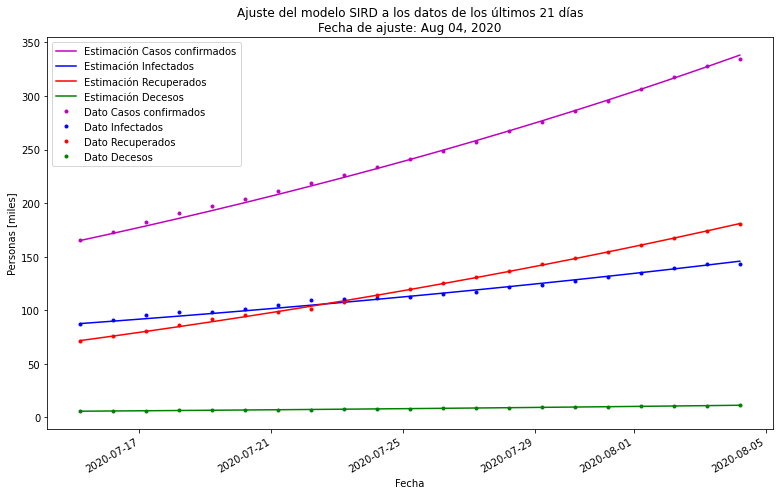

In [15]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 13,8


esc = 1_000 # miles
df_res = pd.DataFrame({
           'fecha':fecha_regresion, 
           #'Estimación Susceptibles':S[:Ndata]/esc,
           'Estimación Casos confirmados':(I[:Ndata]+R[:Ndata]+D[:Ndata])/esc,
           'Estimación Infectados':I[:Ndata]/esc,
           'Estimación Recuperados':R[:Ndata]/esc, 
           'Estimación Decesos':D[:Ndata]/esc,
           #'Dato Susceptibles':Sd/esc, 
           'Dato Casos confirmados':Td/esc, 
           'Dato Infectados':Id/esc, 
           'Dato Recuperados':Rd/esc, 
           'Dato Decesos':Dd/esc, 
         }).set_index('fecha')
fig, ax = plt.subplots()
df_res.plot(style=['m-','b-','r-','g-','m.','b.','r.','g.'], ax=ax)
ax.set_xlabel("Fecha")
ax.set_ylabel("Personas [miles]")
ax.set_title(f'Ajuste del modelo SIRD a los datos de los últimos {Ndata} días\n'
             f'Fecha de ajuste: {fecha_hoy.strftime("%b %d, %Y")}')
ax.legend(loc='best')

Y haciendo una proyección sobre los siguientes 15 meses resulta:

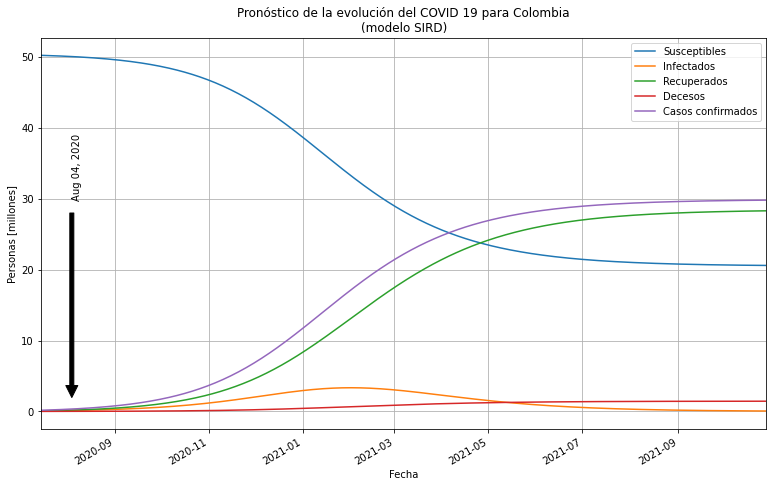

In [16]:
# %% Gráfico del pronóstico
esc = 1_000_000 # millones
fecha_pronostico = pd.date_range(start=fecha_regresion.iloc[0], periods=N_dias_pronostico)
df_res = pd.DataFrame({
                   'fecha':fecha_pronostico, 
                   'Susceptibles':S/esc,                     
                   'Infectados':I/esc,
                   'Recuperados':R/esc, 
                   'Decesos':D/esc,
                   'Casos confirmados':(I + R + D)/esc,                   
                  }).set_index('fecha')
fig, ax = plt.subplots()
df_res.plot(ax=ax)
ax.set_xlabel("Fecha")
ax.set_ylabel("Personas [millones]")
ax.set_title('Pronóstico de la evolución del COVID 19 para Colombia\n(modelo SIRD)') 
ax.legend(loc='best')
ax.grid(True, which="both")    
ax.annotate(fecha_hoy.strftime('%b %d, %Y'), xy=(fecha_hoy,0.5), xytext=(fecha_hoy, 30),
            arrowprops=dict(facecolor='black', shrink=0.05), rotation=90
            )
ax.autoscale(enable=True, axis='x', tight=True)
#plt.yscale('log')

De esta gráfica se observa que el pico de la pandemia estará alrededor de Febrero 1 de 2020:

In [17]:
df_res['Infectados'].idxmax()

Timestamp('2021-02-01 05:00:00+0000', tz='UTC', freq='D')

Y que al final de la misma tendremos aproximadamente:

In [23]:
print(f'Número de defunciones al final de la pandemia = {D[-1]:.0f} personas')

Número de defunciones al final de la pandemia = 1442650 personas


## Análisis de resultados y comentarios finales

Los resultados aquí mostrados nos dan una pista de que el pico de la pandemia se presentará a principios del 2021 y terminará en el segundo semestre del 2021. De todas formas, dichas fechas tentativas dependerán mucho de las acciones gubernamentales adoptadas, de la cultura ciudadana de autocuidado y distanciamiento social y del avance en las investigaciones de vacunas, fármacos y tratamientos para el manejo del COVID.

El modelo utilizado es muy sensible a las condiciones iniciales, a los parámetros $\beta$, $\gamma$ y $\mu$; además, según lo mencionado en la sección ***Limitaciones y suposiciones del modelo SIRD***, son muchos los factores que intervienen en la dinámica de la pandemia que no están apropiadamente representadas en el modelo matemático, el cual puede llevar a variaciones en los resultados.

El modelo muestra que es nuestra responsabilidad adoptar medidas personales de aislamiento y buena higiene, ya que de lo contrario más de un millón de personas podrían fallecer.

Finalmente, tenga en cuenta que yo no soy un epidemiólogo; soy un ingeniero que aplica estas técnicas en la modelación de estructuras. Sería de mi agrado que epidemiólogos, virólogos y salubristas y otros profesionales de la salud me hicieran comentarios al respecto de este análisis.